In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt

data = pd.read_csv('student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
data.isnull().sum().sum()

0

In [13]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

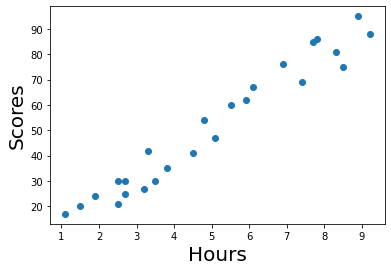

In [21]:
# splitting data into input and output features
x = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values
plt.scatter(x,y)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

In [22]:
model = lr().fit(x,y)

In [24]:
print('intercept : ',model.intercept_)
print('slope : ',model.coef_)

intercept :  2.483673405373196
slope :  [9.77580339]


In [25]:
y_pred = model.predict(x)

In [26]:
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

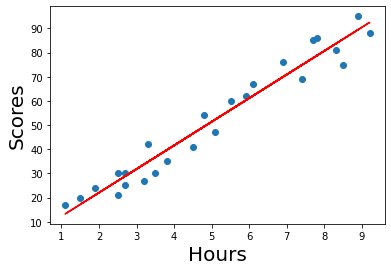

In [28]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

In [30]:
from sklearn.metrics import r2_score
score = r2_score(y,y_pred)
score

0.9529481969048356

In [33]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y,y_pred))
print('MSE : ',metrics.mean_squared_error(y,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE :  4.972805319866375
MSE :  28.88273050924546
RMSE :  5.374265578592619


In [40]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)


In [41]:
training_model = lr()
training_model.fit(x_train,y_train)
y_pred_train = training_model.predict(x_train)

In [42]:
y_pred_test = training_model.predict(x_test)

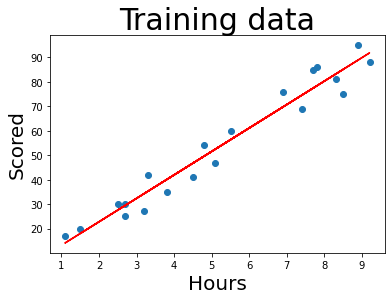

In [46]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,'r-')
plt.title('Training data',fontsize = 30)
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scored', fontsize = 20)
plt.show()

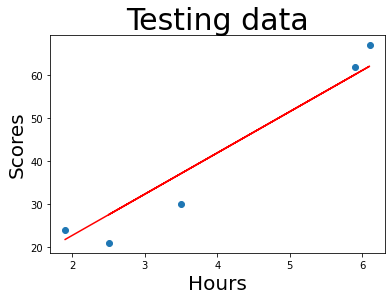

In [47]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'r-')
plt.title('Testing data',fontsize = 30)
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.show()

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_train,y_pred_train)
score

0.9526578687835935

In [49]:
score = r2_score(y_test,y_pred_test)
score

0.9344136548407237

In [51]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE : ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE :  4.992382952176625
MSE :  30.077757870391487
RMSE :  5.484319271376484


In [52]:
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE :  4.522213599914792
MSE :  25.274353970578723
RMSE :  5.027360537158512
